# This script is for color generation and manupulation in COCO dataset for unsupervised color&textual grounding

## Color detection in image and return a closest color label

In [40]:
import webcolors
from PIL import Image
from webcolors import rgb_to_name, name_to_rgb

In [34]:
# Define a list of colors of our interests
color_dict = ['red', 'blue', 'black', 'orange', 'brown', 'white', 'green', 'yellow']
webcolros_dict = webcolors.css3_hex_to_names.items()

# Copy the RGB values of the color list
new_webcolors_dict = {}
for key, name in webcolros_dict:
    if name in color_dict:
        new_webcolors_dict[key] = name

# Compute the most similar color based on their Euclidean distance
def closest_colour(requested_colour, new_webcolors_dict):
    min_colours = {}
    for key, name in new_webcolors_dict.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]

def get_colour_name(requested_colour):
    try:
        closest_name = actual_name = webcolors.rgb_to_name(requested_colour)
    except ValueError:
        closest_name = closest_colour(requested_colour, new_webcolors_dict)
        actual_name = None
    return actual_name, closest_name

requested_colour = (203, 17, 15)
actual_name, closest_name = get_colour_name(requested_colour)

print("Actual colour name:", actual_name, ", closest colour name:", closest_name)

Actual colour name: None , closest colour name: brown


## Generating RGB value based on color label

In [12]:
name_to_rgb('midnightblue')

IntegerRGB(red=25, green=25, blue=112)

## Pixel Color Detection and Manupulation in real images

In [73]:
# Real Image Loading and retrieving RGB values
picture = Image.open("test.jpg")
# Get the size of the image
width, height = picture.size

# Process every pixel
for x in range(width):
    for y in range(height):
        color_rgb = picture.getpixel((x, y))
        # Color Detection
        _, color_det = get_colour_name(color_rgb)
        if color_det == 'orange':
            new_color = name_to_rgb('yellow')
            picture.putpixel((x, y), new_color)

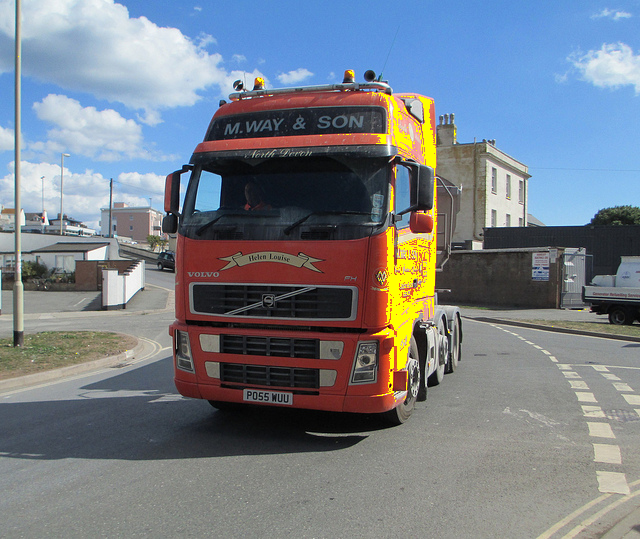

In [74]:
picture

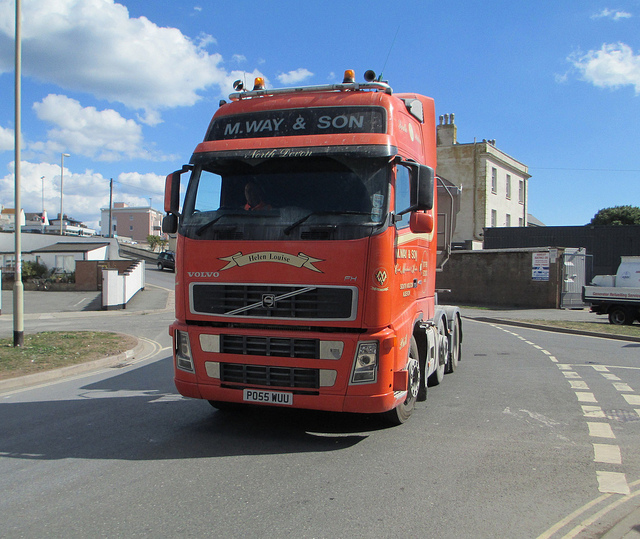

In [59]:
picture